In [5]:
%matplotlib inline

import os
import sys
from subprocess import call
from datetime import datetime,timedelta

import socket

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import xarray as xr
import numpy as np

hostname = socket.gethostname()
if any(s in hostname for s in ['cheyenne','yslogin','gesyer','caldera']):
    scratch = '/glade/scratch/'+os.environ['USER']
elif 'cgd.ucar.edu' in hostname:
    scratch = '/project/oce/mclong/scratch'
droot = os.path.join(scratch,'wod2013')

In [6]:
extraction = 'global_req_temp_salt_o2'
anomaly_method = 'anm_wrt_woa2013v2'
file_in = os.path.join(droot,extraction+'.gridded.ann.'+anomaly_method+'.nc')
ds = xr.open_dataset(file_in)
ds

<xarray.Dataset>
Dimensions:    (depth: 67, lat: 180, latitude: 180, lon: 360, longitude: 360, year: 60)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * depth      (depth) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 ...
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * year       (year) int64 1958 1959 1960 1961 1962 1963 1964 1965 1966 ...
Data variables:
    TEMP       (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...
    SALT       (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...
    O2         (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...
    PD         (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...

In [12]:
ds.lon.values = np.where(ds.lon<0.,ds.lon+360.,ds.lon)
npac = ds.roll(lon=180).sel(lat=slice(0,65),lon=slice(100,280))
npac

<xarray.Dataset>
Dimensions:    (depth: 67, lat: 65, latitude: 180, lon: 180, longitude: 360, year: 60)
Coordinates:
  * lat        (lat) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * depth      (depth) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 ...
  * lon        (lon) float64 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * year       (year) int64 1958 1959 1960 1961 1962 1963 1964 1965 1966 ...
Data variables:
    TEMP       (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...
    SALT       (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...
    O2         (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...
    PD         (year, depth, lat, lon) float64 nan nan nan nan nan nan nan ...

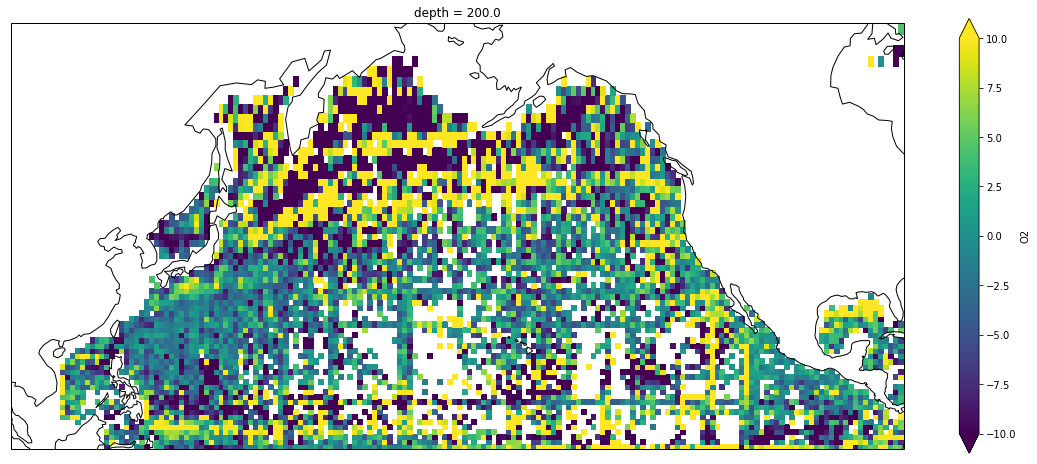

In [21]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180.,max_latitude=65))
npac.O2.sel(depth=200.).mean(dim='year').plot.pcolormesh(ax=ax,vmin=-10,vmax=10,transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([100,280,0,65])

In [38]:
import grid_tools

islatlon = True
nx = 360
ny = 180
grid = grid_tools.generate_latlon_grid(nx=nx,ny=ny,lon0=-180.)
grid = grid.rename({'latitude':'lat','longitude':'lon'})
grid

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, nv: 4)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Dimensions without coordinates: nv
Data variables:
    xc       (lat, lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
    yc       (lat, lon) float64 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 ...
    xv       (lat, lon, nv) float64 -180.0 -179.0 -179.0 -180.0 -179.0 ...
    yv       (lat, lon, nv) float64 -90.0 -90.0 -89.0 -89.0 -90.0 -90.0 ...
    area     (lat, lon) float64 1.079e+08 1.079e+08 1.079e+08 1.079e+08 ...

In [22]:
npac.coords

Coordinates:
  * lat        (lat) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * depth      (depth) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 ...
  * lon        (lon) float64 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * year       (year) int64 1958 1959 1960 1961 1962 1963 1964 1965 1966 ...

In [26]:



npac26_5

<xarray.DataArray (year: 60, lat: 65, lon: 180)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * lat      (lat) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float64 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5 ...
  * year     (year) int64 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 .

array([ 0.10711882,  0.40010356,  0.41168498,  0.49499367,  0.52038233,
        0.66673104,  0.73361385,  0.74376369,  0.74500992,  0.74828331])

In [ ]:
THICKNESS,VAR_OUT = remap_z_type(klev_out,KMT,z_edges,Z,SIGMA,sigma_edges)  